In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score, mean_squared_error

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

import statsmodels.api as sm

#And for visualization purposes importing both seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing the training data as df. 
df = pd.read_csv('datasets/train.csv')

#Setting the ID's in the  as the dataframe index
df = df.set_index('Id')

#And organizing the columns in alphabetical order to expedite exploratory analysis.
df = df.reindex(sorted(df.columns), axis=1)

#To update the column titles to make it easier to use going forward. 
for col in df.columns:
    df.rename(columns={col:col.lower().replace(" ","_")},inplace=True)
df.head()

,1st_flr_sf,2nd_flr_sf,3ssn_porch,alley,bedroom_abvgr,bldg_type,bsmt_cond,bsmt_exposure,bsmt_full_bath,bsmt_half_bath,...,saleprice,screen_porch,street,totrms_abvgrd,total_bsmt_sf,utilities,wood_deck_sf,year_built,year_remod/add,yr_sold
Id,,,,,,,,,,,,,,,,,,,,,
109,725,754,0,NaN,3,1Fam,TA,No,0.0,0.0,...,130500,0,Pave,6,725.0,AllPub,0,1976,2005,2010
544,913,1209,0,NaN,4,1Fam,TA,No,1.0,0.0,...,220000,0,Pave,8,913.0,AllPub,0,1996,1997,2009
153,1057,0,0,NaN,3,1Fam,TA,No,1.0,0.0,...,109000,0,Pave,5,1057.0,AllPub,0,1953,2007,2010
318,744,700,0,NaN,3,1Fam,TA,No,0.0,0.0,...,174000,0,Pave,7,384.0,AllPub,100,2006,2007,2010
255,831,614,0,NaN,3,1Fam,Gd,No,0.0,0.0,...,138500,0,Pave,6,676.0,AllPub,0,1900,1993,2010


In [ ]:
#Our first look at the data set indentifies 2050 data points in our training data set, with more than 80 variables to 
#consider in making our selection for our predictive model.
df.info()

In [3]:
#Some basic statistical information relating to our data set. 
# We can see that there are no negative variables (indicating errors in the data), 
#and we can get a rough idea of the distributions of each feature
df.describe().T

,count,mean,std,min,25%,50%,75%,max
1st_flr_sf,2051.0,1.164488e+03,3.964469e+02,334.0,879.5,1093.0,1.405000e+03,5095.0
2nd_flr_sf,2051.0,3.293291e+02,4.256710e+02,0.0,0.0,0.0,6.925000e+02,1862.0
3ssn_porch,2051.0,2.591419e+00,2.522961e+01,0.0,0.0,0.0,0.000000e+00,508.0
bedroom_abvgr,2051.0,2.843491e+00,8.266183e-01,0.0,2.0,3.0,3.000000e+00,8.0
bsmt_full_bath,2049.0,4.275256e-01,5.226732e-01,0.0,0.0,0.0,1.000000e+00,3.0
bsmt_half_bath,2049.0,6.344558e-02,2.517052e-01,0.0,0.0,0.0,0.000000e+00,2.0
bsmt_unf_sf,2050.0,5.677283e+02,4.449548e+02,0.0,220.0,474.5,8.110000e+02,2336.0
bsmtfin_sf_1,2050.0,4.423005e+02,4.612041e+02,0.0,0.0,368.0,7.337500e+02,5644.0
bsmtfin_sf_2,2050.0,4.795902e+01,1.650009e+02,0.0,0.0,0.0,0.000000e+00,1474.0
enclosed_porch,2051.0,2.257192e+01,5.984511e+01,0.0,0.0,0.0,0.000000e+00,432.0


## Data and Null Values Exploration and Cleaning 

An interesting feature of this data set is there are actually very few truly missing data points. Through exploring the dictionary associated with the data, we can see that most of the missing values are actually a label of quality or whether they are present or not.

For example, NaN in pool quality indicates there is no pool, not that there is missing data on this feature. 

For some for the more important features, like lot frontage, which is numerical, a missing value is not indicated as no lot frontage or missing values, and therefore are dropped from the dataset. 

Through this section, we will explore each feature present in the data set, perform some intial analysis on their affects on the sale price, and clean out any true null values. 

In [4]:
#Below is a list of all the null values present in the dataset. We will go through this list and explore the associated 
#features. 

pd.options.display.min_rows = 80
df.isnull().sum().sort_values(ascending = False)

pool_qc            2042
misc_feature       1986
alley              1911
fence              1651
fireplace_qu       1000
lot_frontage        330
garage_yr_blt       114
garage_finish       114
garage_cond         114
garage_qual         114
garage_type         113
bsmt_exposure        58
bsmtfin_type_2       56
bsmtfin_type_1       55
bsmt_cond            55
bsmt_qual            55
mas_vnr_area         22
mas_vnr_type         22
bsmt_half_bath        2
bsmt_full_bath        2
total_bsmt_sf         1
garage_cars           1
bsmtfin_sf_1          1
garage_area           1
bsmtfin_sf_2          1
bsmt_unf_sf           1
functional            0
foundation            0
fireplaces            0
exterior_2nd          0
                   ... 
pool_area             0
roof_matl             0
roof_style            0
saleprice             0
open_porch_sf         0
screen_porch          0
street                0
totrms_abvgrd         0
utilities             0
wood_deck_sf          0
year_built      

##### Lot Frontage

Because there are no values for 0 lot frontage, we can assume that NaN refers to a unit having no lot frontage. 

So we can replace these with 0, as there are 0 feet of lot frontage for a unit. This especailly makes sense for floating villages. 

In [5]:
df.loc[(df['lot_frontage']<1) | (df['lot_frontage'].isnull()), ['lot_frontage','saleprice', 'ms_zoning']]

,lot_frontage,saleprice,ms_zoning
Id,,,
109,NaN,130500,RL
145,NaN,142000,RL
1942,NaN,112500,RL
12,NaN,185000,RL
1534,NaN,198000,RL
2860,NaN,230000,RL
983,NaN,165500,RL
2511,NaN,166000,FV
997,NaN,173000,RL


##### Basement Features

*Basement Square Feet*

There is one missing value for all three basement square feet measurements, all coming from the same row, so we can delete this missing value. I believe going forward with this analysis, I expect the size of the basement will factor into house price, even though house listings typically don't count basement square footage. 

In [6]:
df.loc[(df['bsmtfin_sf_2'].isnull()) | (df['bsmtfin_sf_2'].isnull())]

,1st_flr_sf,2nd_flr_sf,3ssn_porch,alley,bedroom_abvgr,bldg_type,bsmt_cond,bsmt_exposure,bsmt_full_bath,bsmt_half_bath,...,saleprice,screen_porch,street,totrms_abvgrd,total_bsmt_sf,utilities,wood_deck_sf,year_built,year_remod/add,yr_sold
Id,,,,,,,,,,,,,,,,,,,,,
1342,896,0,0,NaN,2,1Fam,NaN,NaN,NaN,NaN,...,79000,0,Pave,4,NaN,AllPub,0,1946,1950,2008


##### Basement Exposure and Condition Nulls

In [872]:
df.loc[(df['bsmt_exposure'].isnull()) | (df['bsmt_cond'].isnull()),['bsmt_cond', 'bsmt_exposure', 'bsmt_full_bath', 'bsmt_half_bath', 'total_bsmt_sf', 'bsmtfin_type_1', 'bsmtfin_type_2', 'bsmtfin_sf_1']]

,bsmt_cond,bsmt_exposure,bsmt_full_bath,bsmt_half_bath,total_bsmt_sf,bsmtfin_type_1,bsmtfin_type_2,bsmtfin_sf_1
Id,,,,,,,,
807,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0
811,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0
781,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0
888,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0
1554,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0
2740,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0
2242,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0
2745,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0
84,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0


##### Pools, Pool Quality, Sales Price and Missing Values

In [873]:
#In exploring if a pool and it's quality affect sales price, let's see if any pools have a missing quality feature.
df.loc[df['pool_area'] > 0, ['pool_qc', 'misc_feature', 'misc_val', 'pool_area', 'saleprice']]
#An interesting comparision is also which houses have both a pool and miscellaneous feature. Only 1. 

#Given the few pools that have sold, and the seemingly low correlation between pool, quality and sales price, 
#I do not believe this will be a feature we will use in the model. 

,pool_qc,misc_feature,misc_val,pool_area,saleprice
Id,,,,,
2351,Fa,TenC,2000,519,250000
1567,Gd,NaN,0,576,171000
2499,Gd,NaN,0,800,260000
2231,Ex,NaN,0,228,315000
1499,Gd,NaN,0,480,160000
2358,Fa,NaN,0,648,181000
2736,Gd,NaN,0,738,274970
1941,TA,NaN,0,368,153000
2279,TA,NaN,0,561,130000


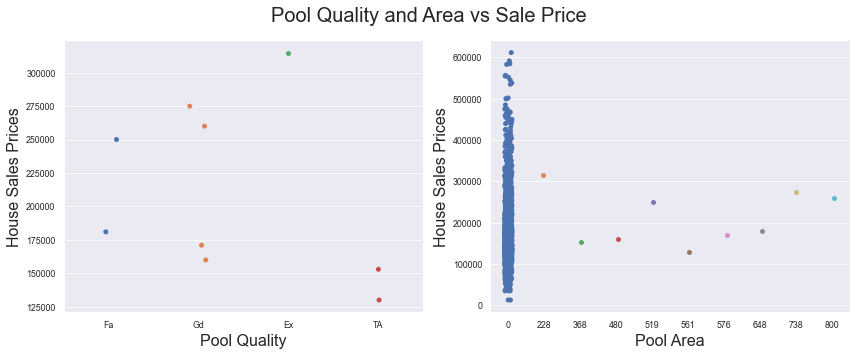

In [874]:
fig = plt.figure(figsize=(12, 5))
fig.suptitle('Pool Quality and Area vs Sale Price', fontsize = 20,)


ax1 = fig.add_subplot(121)
sns.stripplot(x='pool_qc', y="saleprice", data=df, ax=ax1) 
ax1.set(xlabel ='Pool Quality' , ylabel='House Sales Prices')


ax2 = fig.add_subplot(122)
sns.stripplot(x="pool_area", y="saleprice", data=df, ax=ax2) 
ax2.set(xlabel ='Pool Area' , ylabel='House Sales Prices')

plt.tight_layout()

#Pool quality does not in any way seem correlated with the sales price. TA (typical/average) is of higher quality than
#Fair, yet the sales prices on the homes do not reflect that Similarly, the sales price on good quality pools is almost
#identical to that of fair, the lowest quality ranking. 

###### Misc. Features and Values
The miscellaneous features and their values could help explain the outliers in higher sales prices. 
The NaN values refers to no additional features, not that there is missing data. 

While there are only a handful of data points for these features, they could help explain some of the higher sales prices. However, a quick look shows that the elevator, while values high, doesn't seem to boost up the value of the sale, which is right around the mean sale price across the board. 

In [875]:
df.loc[df['misc_val'] > 1000, ['ms_zoning', 'neighborhood', 'misc_val', 'misc_feature', 'saleprice'] ].sort_values('misc_val', ascending = False)

,ms_zoning,neighborhood,misc_val,misc_feature,saleprice
Id,,,,,
2181,RL,Edwards,17000,Elev,183850
3,RL,NAmes,12500,Gar2,172000
1862,RL,Sawyer,8300,Gar2,190000
1263,RL,NAmes,6500,Othr,186000
1443,RL,CollgCr,4500,Shed,235000
2669,RM,OldTown,4500,Gar2,125000
207,RM,IDOTRR,3500,Othr,55000
1508,RL,Edwards,3000,Gar2,99000
2480,RL,SawyerW,3000,Othr,248500


##### Garage Features

This section will explore the garage year built, it's quality categories, finishes, overall condition and type.

In [876]:
df.loc[(df['garage_yr_blt'].isnull()) | (df['garage_qual'].isnull()) | 
       (df['garage_finish'].isnull()) | (df['garage_cond'].isnull()), 
       ['garage_area', 'garage_cond', 'garage_finish', 'garage_qual', 'garage_yr_blt','garage_cars', 'garage_type', 'saleprice']].sort_values('saleprice', ascending = False)
#There are 100 houses sold which do not have a garage. There is one record (index row 1712), however, 
#that seems to be missing data. We have the garage type, but no information about it, including square feet,
# so it is not very useful. Looking at the final test data, we see that this example is present. Therefore, we will 
#leave the data in this set, setting the NaN's to 0, and allowing the model to pick up on other data points to make the
#final prediction. 

,garage_area,garage_cond,garage_finish,garage_qual,garage_yr_blt,garage_cars,garage_type,saleprice
Id,,,,,,,,
2046,0.0,NaN,NaN,NaN,NaN,0.0,NaN,200500
2195,0.0,NaN,NaN,NaN,NaN,0.0,NaN,200000
764,0.0,NaN,NaN,NaN,NaN,0.0,NaN,179000
763,0.0,NaN,NaN,NaN,NaN,0.0,NaN,179000
2846,0.0,NaN,NaN,NaN,NaN,0.0,NaN,160000
204,0.0,NaN,NaN,NaN,NaN,0.0,NaN,159900
2237,NaN,NaN,NaN,NaN,NaN,NaN,Detchd,150909
2083,0.0,NaN,NaN,NaN,NaN,0.0,NaN,150000
1951,0.0,NaN,NaN,NaN,NaN,0.0,NaN,148000


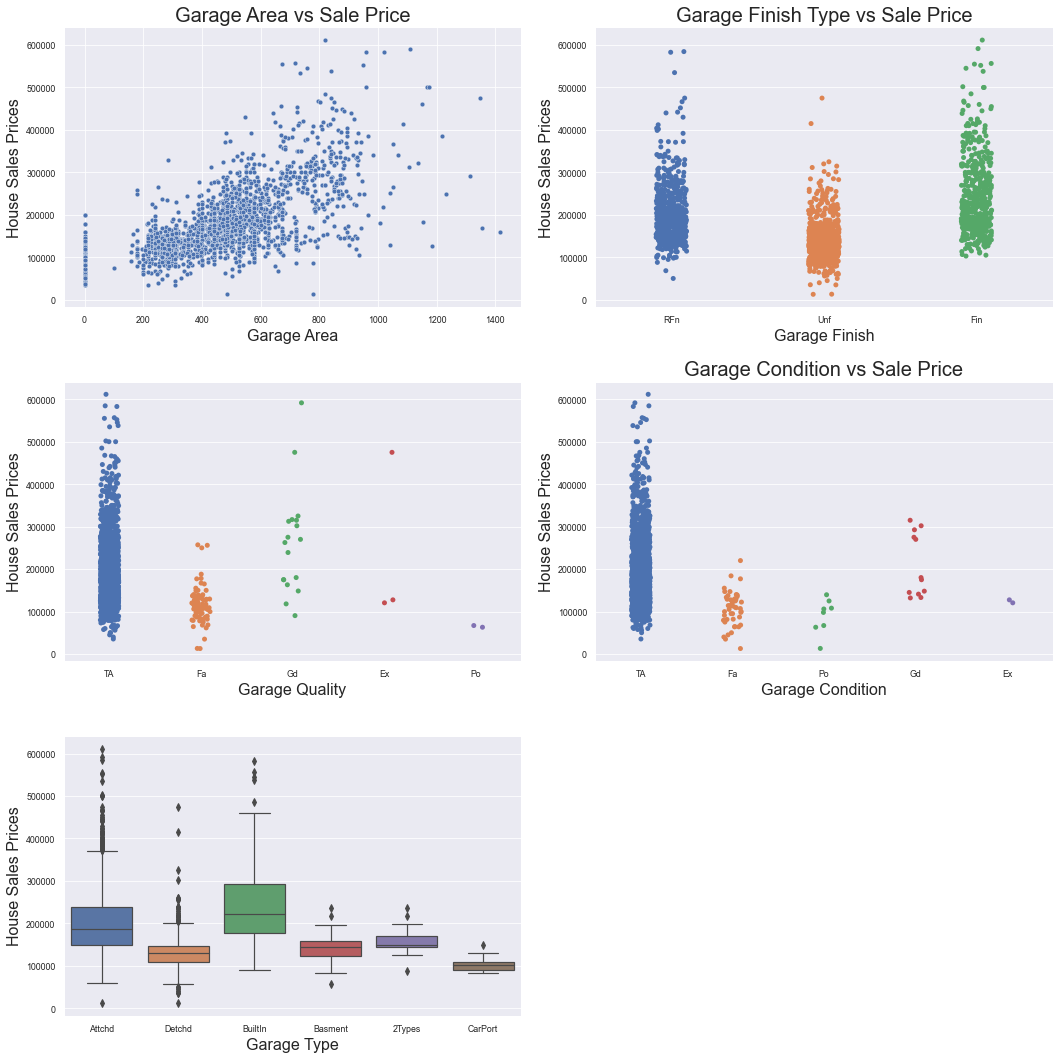

In [877]:
#next let's make some plots to see if any of these features are related to sales price. 
fig = plt.figure(figsize=(15, 15))
fig.subplots_adjust(hspace = -1)
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":20,"axes.labelsize":16})   



ax1 = fig.add_subplot(321)
g=sns.scatterplot(x='garage_area', y="saleprice", data=df, ax=ax1) # pass ax1
g.set(xlabel ='Garage Area' , ylabel='House Sales Prices', title = 'Garage Area vs Sale Price')


ax2 = fig.add_subplot(322)
g = sns.stripplot(x="garage_finish", y="saleprice", data=df, ax=ax2, dodge = True) # pass ax2
g.set(xlabel ='Garage Finish' , ylabel='House Sales Prices',  title = 'Garage Finish Type vs Sale Price')

ax3 = fig.add_subplot(323)
g = sns.stripplot(x="garage_qual", y="saleprice", data=df, ax=ax3, dodge = True) # pass ax2
g.set(xlabel ='Garage Quality' , ylabel='House Sales Prices')

ax4 = fig.add_subplot(324)
g = sns.stripplot(x="garage_cond", y="saleprice", data=df, ax=ax4, dodge = True) # pass ax2
g.set(xlabel ='Garage Condition' , ylabel='House Sales Prices', title = 'Garage Condition vs Sale Price')


ax5 = fig.add_subplot(325)
g = sns.boxplot(x="garage_type", y="saleprice", data=df, ax=ax5) # pass ax2
g.set(xlabel ='Garage Type' , ylabel='House Sales Prices')


plt.tight_layout();

**Findings:**

Looks like garage features have an impact on sales price.

 - Garage area is roughly linearly correlated with sales price. 
 - No home without a garage sold for more than 200,000
 - Unfinished garages generally sell for less than finished or roughly finished garages.
     - There is only a moderate difference between roughly finished and fully finished garages. 
 - Attached and built-in garages have a much larger range in sales prices. The top limit is much higher than detached or basement, however the bulk of the sales prices is only moderately higher than detached, basement and two types of garages. 
 - Car ports do not appear to offer anywhere near the value that the others provide. 
 - There are two categories for garages that are somewhat similar (Condition and Quality). It may be worth combining these to help the generalization of the model going forward. 
 
##### Fencing and Alleys

There are many missing values for Fencing and Alley features. But in looking at the data dictionary, this implies that the missing values are actually indicating that there is no fence or alley access, not that the data is missing. Thus we can leave the nulls to be replaced by 0 to indicate 0 feet of fencing and no fencing type, and 0 type of Alley access. 

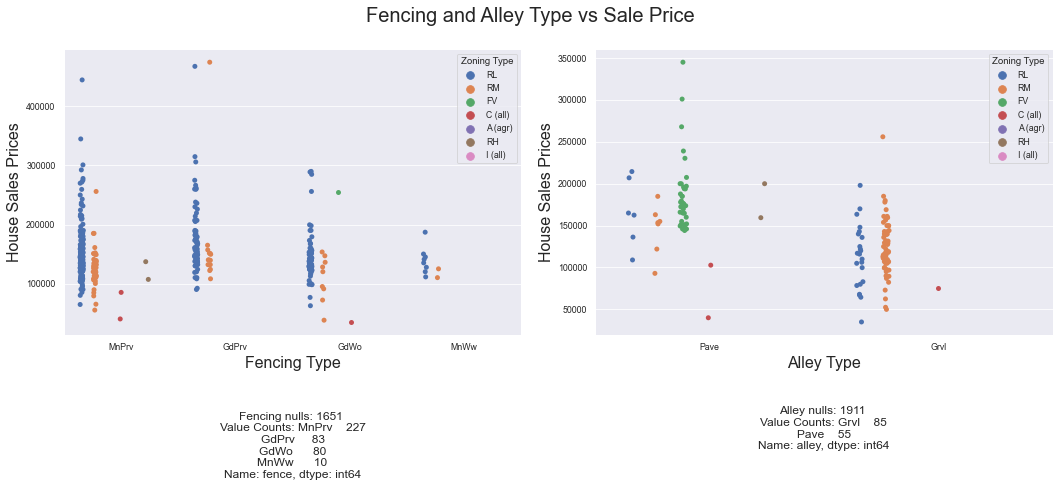

In [878]:
fig = plt.figure(figsize=(15, 8))
fig.suptitle('Fencing and Alley Type vs Sale Price', fontsize = 20,)

ax1 = fig.add_subplot(121)
g=sns.stripplot(x='fence', y="saleprice", hue = 'ms_zoning', data=df, ax=ax1, dodge = True) # pass ax1
g.set(xlabel ='Fencing Type' , ylabel='House Sales Prices')
g.legend(title = 'Zoning Type')
ax1.text(0.5,-0.5, f"""Fencing nulls: {df.fence.isnull().sum()} 
Value Counts: {df.fence.value_counts()}""", size=12, ha="center", transform=ax1.transAxes)


ax2 = fig.add_subplot(122)
g = sns.stripplot(x="alley", y="saleprice", hue = 'ms_zoning', data=df, ax=ax2, dodge = True) # pass ax2
g.set(xlabel ='Alley Type' , ylabel='House Sales Prices')
g.legend(title = 'Zoning Type')
ax2.text(0.5,-0.4, f"""Alley nulls: {df.alley.isnull().sum()} 
Value Counts: {df.alley.value_counts()}""", size=12, ha="center", transform=ax2.transAxes)

plt.tight_layout();

##### Fireplaces and Quality

There are no presence of fireplaces in a house, where quality is a missing value, so we can replace the missing quality values with 0 to indicate that there are no fireplaces, and the non-existent fireplaces are of 0 quality. 

In [879]:
df.loc[(df['fireplaces'] > 0) & (df['fireplace_qu'].isnull()), ['fireplaces', 'saleprice', 'fireplace_qu']]

,fireplaces,saleprice,fireplace_qu
Id,,,


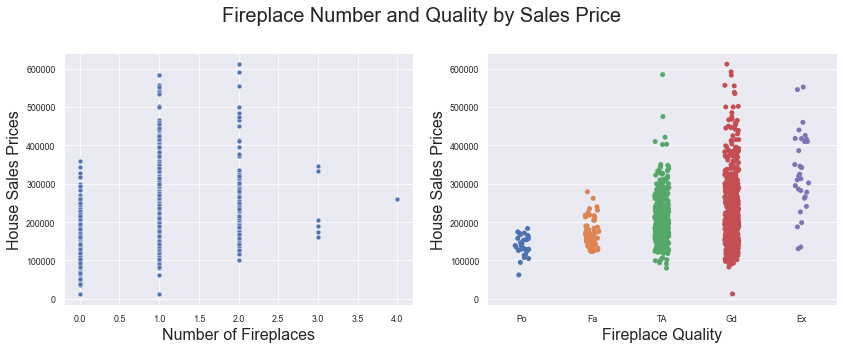

In [880]:
fig = plt.figure(figsize=(12, 5))
fig.suptitle('Fireplace Number and Quality by Sales Price', fontsize = 20,)

ax1 = fig.add_subplot(121)
g=sns.scatterplot(x='fireplaces', y="saleprice", data=df, ax=ax1) # pass ax1
g.set(xlabel ='Number of Fireplaces' , ylabel='House Sales Prices')

ax2 = fig.add_subplot(122)
g = sns.stripplot(x="fireplace_qu", y="saleprice", order = ['Po', 'Fa', 'TA', 'Gd', 'Ex'],dodge =True, data=df, ax=ax2) # pass ax2
g.set(xlabel ='Fireplace Quality' , ylabel='House Sales Prices')
plt.tight_layout();

In [881]:
df.loc[df['fireplaces'] > 3, ['saleprice', 'fireplaces']]

#The house with the most fireplaces doesn't sell for an extremely high value. It appears that number of fireplaces 
#increases up to 2, after which it doesn't appear to have an effect. 

,saleprice,fireplaces
Id,,
2499,260000,4


## Categorical Feature Exploration

##### Zoning Classification Analysis and Cleaning

Because this project is specifically looking at residential housing prices, and there are not many Industrial and Commercial property types, we will drop the rows identified as industrial and Commercial.

In [882]:
df.ms_zoning.value_counts()

RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: ms_zoning, dtype: int64

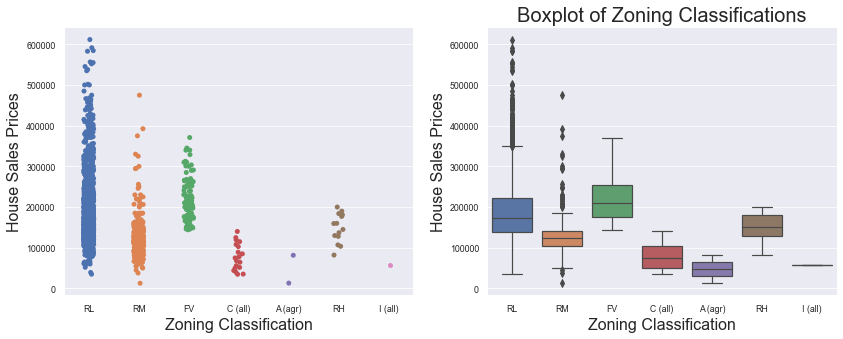

In [884]:
#A brief look at sale prices by zoning classification. 
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":20,"axes.labelsize":16})   

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(121)
g=sns.stripplot(x='ms_zoning', y="saleprice", data=df, ax=ax1) # pass ax1
g.set(xlabel ='Zoning Classification' , ylabel='House Sales Prices')


ax2 = fig.add_subplot(122)
g = sns.boxplot(x="ms_zoning", y="saleprice", data=df, ax=ax2) # pass ax2
g.set(xlabel ='Zoning Classification' , ylabel='House Sales Prices', title = 'Boxplot of Zoning Classifications')

plt.tight_layout()

##### Street, Driveway, Utilities

Exploring these cateogircal features to see if they have any effect on the sale price of a house. 

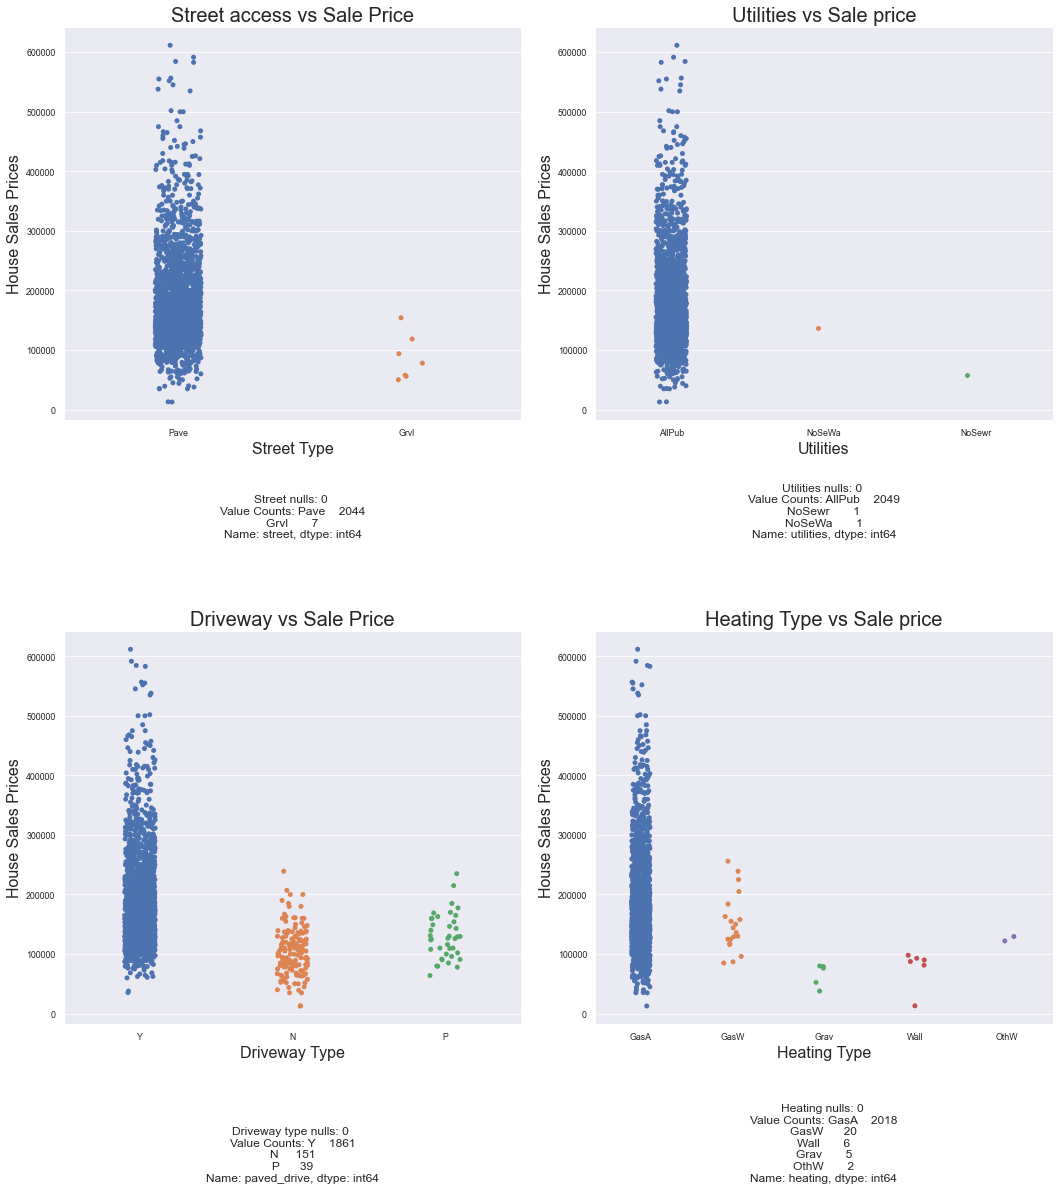

In [885]:
fig = plt.figure(figsize=(15, 23))
fig.subplots_adjust( hspace = -0.2)

ax1 = fig.add_subplot(321)
g=sns.stripplot(x='street', y="saleprice", data=df, ax=ax1)
g.set(xlabel = 'Street Type', ylabel='House Sales Prices', title = 'Street access vs Sale Price')
ax1.text(0.5,-0.3, f"""Street nulls: {df.street.isnull().sum()} 
Value Counts: {df.street.value_counts()}""", size=12, ha="center", transform=ax1.transAxes)

ax2 = fig.add_subplot(322)
g = sns.stripplot(x="utilities", y="saleprice", data=df, ax=ax2, dodge = True) 
g.set(xlabel = 'Utilities', ylabel='House Sales Prices', title = 'Utilities vs Sale price')
ax2.text(0.5,-0.3, f"""Utilities nulls: {df.utilities.isnull().sum()} 
Value Counts: {df.utilities.value_counts()}""", size=12, ha="center", transform=ax2.transAxes)


ax3 = fig.add_subplot(323)
g=sns.stripplot(x='paved_drive', y="saleprice", data=df, ax=ax3)
g.set(xlabel = 'Driveway Type', ylabel='House Sales Prices', title = 'Driveway vs Sale Price')
ax3.text(0.5,-0.4, f"""Driveway type nulls: {df.paved_drive.isnull().sum()} 
Value Counts: {df.paved_drive.value_counts()}""", size=12, ha="center", transform=ax3.transAxes)

ax4 = fig.add_subplot(324)
g = sns.stripplot(x="heating", y="saleprice", data=df, ax=ax4, dodge = True) 
g.set(xlabel = 'Heating Type', ylabel='House Sales Prices', title = 'Heating Type vs Sale price')
ax4.text(0.5,-0.4, f"""Heating nulls: {df.heating.isnull().sum()} 
Value Counts: {df.heating.value_counts()}""", size=12, ha="center", transform=ax4.transAxes)

plt.tight_layout();

There is not enough data on other utility types to make a difference in predicting housing prices, so this will be dropped from the data set prior to feature engineering. 


##### Lot Configuration and Slope

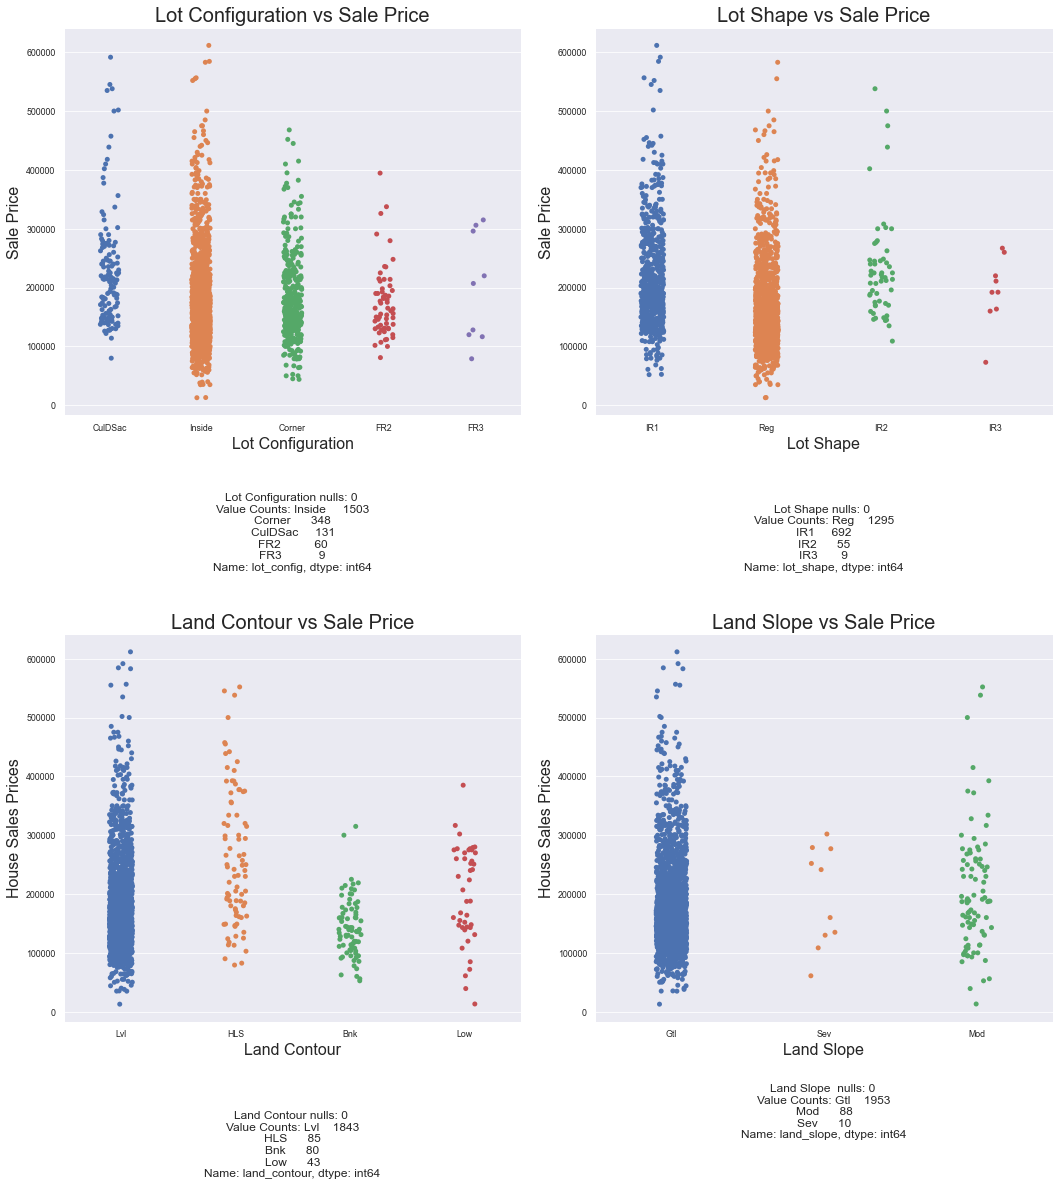

In [887]:
fig = plt.figure(figsize=(15, 23))
fig.subplots_adjust( hspace = -0.1)

ax1 = fig.add_subplot(321)
g=sns.stripplot(x='lot_config', y="saleprice",  data=df, ax=ax1) # pass ax1
g.set(xlabel = 'Lot Configuration', ylabel='Sale Price', title = 'Lot Configuration vs Sale Price')
ax1.text(0.5,-0.4, f"""Lot Configuration nulls: {df.lot_config.isnull().sum()} 
Value Counts: {df.lot_config.value_counts()}""", size=12, ha="center", transform=ax1.transAxes)

ax2 = fig.add_subplot(322)
g = sns.stripplot(x="lot_shape", y="saleprice", data=df, ax=ax2, dodge = True) # pass ax2
g.set(xlabel = 'Lot Shape',  ylabel='Sale Price', title = 'Lot Shape vs Sale Price')
ax2.text(0.5,-0.4, f"""Lot Shape nulls: {df.lot_shape.isnull().sum()} 
Value Counts: {df.lot_shape.value_counts()}""", size=12, ha="center", transform=ax2.transAxes)

ax3 = fig.add_subplot(323)
g = sns.stripplot(x="land_contour", y="saleprice", data=df, ax=ax3, dodge = True) # pass ax2
g.set(xlabel ='Land Contour' , ylabel='House Sales Prices', title = 'Land Contour vs Sale Price')
ax3.text(0.5,-0.4, f"""Land Contour nulls: {df.land_contour.isnull().sum()} 
Value Counts: {df.land_contour.value_counts()}""", size=12, ha="center", transform=ax3.transAxes)

ax4 = fig.add_subplot(324)
g = sns.stripplot(x="land_slope", y="saleprice", data=df, ax=ax4, dodge = True) # pass ax2
g.set(xlabel ='Land Slope' , ylabel='House Sales Prices', title = 'Land Slope vs Sale Price')
ax4.text(0.5,-0.3, f"""Land Slope  nulls: {df.land_slope.isnull().sum()} 
Value Counts: {df.land_slope.value_counts()}""", size=12, ha="center", transform=ax4.transAxes)

plt.tight_layout();

Lot configuration appears to dictate the price range, while Land Slope has no real pattern in price ranges, other than the few data points for severe slopping, which are not enough to make a reliable prediction. Thus, land slope will not be used in the model. 

In land Contour, banked properties never exceed $300,000, and low depression properties also range lower in prices. Similarly, irregularly shaped lots tend to sell for lower, however there is not much data to make a solid prediction of this feature. 

## Neighborhood vs Sale Price

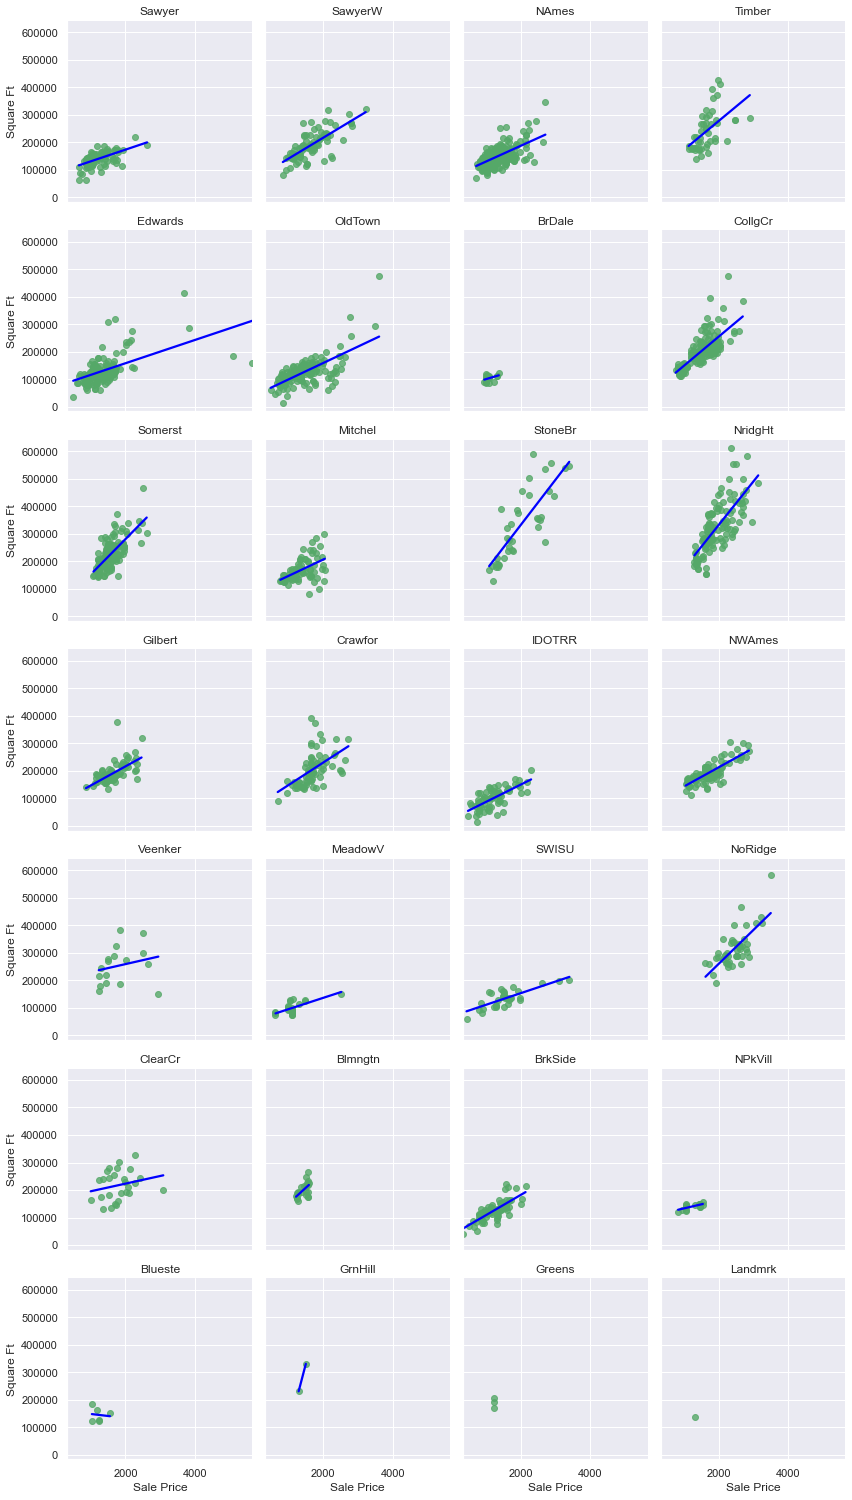

In [889]:
sns.set_theme(color_codes=True)
g= sns.FacetGrid(df, col = 'neighborhood', col_wrap = 4)
g = g.map(sns.regplot,'gr_liv_area', 'saleprice', ci = None, color = 'g', line_kws ={'color':'blue'})
g.set_titles('{col_name}')
g.set_axis_labels('Sale Price', 'Square Ft');


